In [1]:
from pycbc.frame import *
import matplotlib.pyplot as plt
import lal
import numpy as np

import sys
RIFT = "RIFT-LISA-3G-O4c"
sys.path.append(f"/Users/aasim/Desktop/Research/Mcodes/{RIFT}/MonteCarloMarginalizeCode/Code")

import RIFT.lalsimutils as lsu
from RIFT.LISA.response.LISA_response import *

def create_lal_REAL8TimeSeries(pycbc_tseries):
    ht_lal = lal.CreateREAL8TimeSeries("ht_lal", pycbc_tseries._epoch, 0, pycbc_tseries.delta_t, lal.DimensionlessUnit, len(pycbc_tseries.data))
    ht_lal.data.data = pycbc_tseries.data
    return ht_lal

/Users/aasim/opt/anaconda3/envs/mbhb-pycbc/lib/python3.12/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


No CuPy
No CuPy or GPU PhenomHM module.
No CuPy or GPU response available.
No CuPy or GPU interpolation available.
Import Error - module missing. Please install the module "precession."


[Loading lalsimutils.py : MonteCarloMarginalization version]
  scipy :  1.14.0
  numpy :  1.26.4


In [2]:
htA = read_frame("/Users/aasim/Desktop/Research/Mcodes/mbhbs-with-pycbc/signal_generation/no_gbs/files/0_A_nogbs.gwf", 'LA:LA')
htA_lal = create_lal_REAL8TimeSeries(htA)
htA_lal.epoch, htA_lal.f0, htA_lal.deltaT, htA_lal.data.length

(LIGOTimeGPS(0, 0), 0.0, 5.0, 6307200)

0


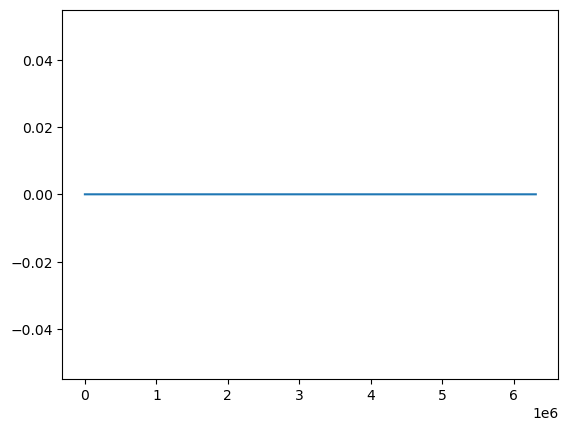

In [3]:
diff = htA.data - htA_lal.data.data
plt.plot(diff)
print(np.argmax(diff))

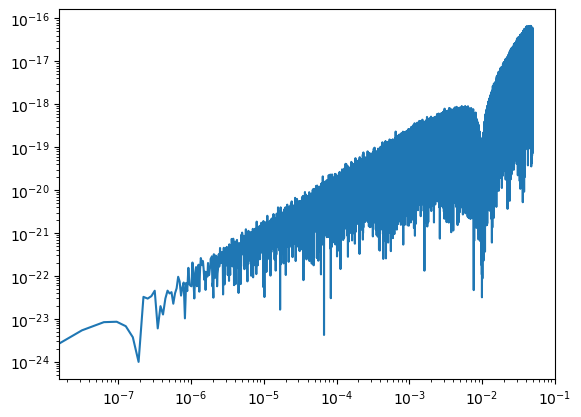

In [5]:
hfA = lsu.DataFourierREAL8(htA_lal)
fvals = -hfA.deltaF*np.arange(hfA.data.length//2, -hfA.data.length//2, -1)
plt.loglog(fvals, 2* fvals* np.abs(hfA.data.data))

